# Problema 3 - Análisis Datos Youtube - Archivo .py

1. Descargar un archivo .zip mediante código del siguiente url (https://netsg.cs.sfu.ca/youtubedata/) (recomiendo descargar el archivo 0333.zip que es menos pesado)
2. Descomprimir los datos en una carpeta que genere y leer mediante pandas alguno de los archivos en esta. (observar que no es necesario en un primer momento leer los datos con un nombre de columna especifico)

    - Los nombres de columna pueden ser puestos posteriormente
    - El separador de columna es <code>\t</code>
    - Se colocan los nombres de columnas y descripción asociada para su intermetación. Ejemplo columna1 sera VideoID ... 
    

3. Procesar los datos según: 
    - Nos quedaremos con las columnas: VideoID, edad, catgoria, views, rate.
    - Realizar un filtrado básico a los datos. Ejemplo solo seleccionar cierto grupo de categorias

4. Procesamiento en Mongo Db
    - Exportar los datos a mongo DB 
    - Crear 2 graficos con los datos 
    - Compartir link donde encontrar los datos 




| Nombre de la Columna | Descripción                                                                                                 |
|----------------------|-------------------------------------------------------------------------------------------------------------|
| `video ID`           | Una cadena de 11 dígitos, la cual es única                                                                |
| `uploader`           | Una cadena con el nombre de usuario del cargador del video                                                  |
| `age`                | Un número entero que representa los días transcurridos desde la fecha en que se subió el video hasta el 15 de febrero de 2007 (fecha de creación de YouTube) |
| `category`           | Una cadena que indica la categoría del video elegida por el cargador                                       |
| `length`             | Un número entero que representa la duración del video en minutos                                            |
| `views`              | Un número entero que representa el número de visualizaciones del video                                      |
| `rate`               | Un número flotante que indica la calificación del video                                                      |
| `ratings`            | Un número entero que representa el número de calificaciones recibidas por el video                          |
| `comments`           | Un número entero que indica el número de comentarios en el video                                            |
| `related IDs`        | Hasta 20 cadenas de texto con los IDs de videos relacionados                                                |


In [11]:
# PASO 1 DESCARGA 
import requests

# URL del archivo zip
url = 'https://netsg.cs.sfu.ca/youtubedata/0303.zip'

# Descargar el archivo
response = requests.get(url)

# Guardar el archivo localmente
zip_file_path = '0303.zip'
with open(zip_file_path, 'wb') as file:
    file.write(response.content)

print("¡Descarga completa!")



¡Descarga completa!


In [12]:
#PASO 2 DESCOMPRIMIR EL ARCHIVO
import zipfile
import os

# Directorio donde se extraerán los archivos
extract_dir = './youtube_data_0303'

# Descomprimir el archivo
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("¡Extracción completa!")




¡Extracción completa!


In [13]:
#PASO 3 CARGAR LOS DATOS CON PANDA
import pandas as pd

# Ruta al archivo de datos (suponiendo que el archivo se llama '0.txt')
file_path = os.path.join(extract_dir, '0303', '0.txt')

# Cargar solo las primeras 10 columnas del archivo
df = pd.read_csv(file_path, sep='\t', header=None, usecols=range(10))

# Asignar nombres a las columnas
df.columns = ['video_ID', 'uploader', 'age', 'category', 'length', 'views', 'rate', 'ratings', 'comments', 'related_IDs']

# Mostrar las primeras filas del DataFrame para verificar
print(df.head())



      video_ID  uploader  age         category  length   views  rate  ratings  \
0  SZN1ZIHaSEQ     Tam1r  745            Music     192  159108  3.35      417   
1  1l66lVMNvSM  Condadon  744            Music     206  155152  2.36      313   
2  ZgwWgl-jYKU  G4LIFE2U  744            Music     318  126714  3.83      177   
3  Sx9Bi3C4rs8    fniazi  745  News & Politics      34   94087  3.26      356   
4  9EqDhVmPNFs     smosh  745           Comedy      52   83685  4.36     2530   

   comments  related_IDs  
0       381  hJK0g6sRwnA  
1       207  33deKkShu1E  
2       216  EUkxbsoJ_9o  
3       877  yLWfACJAKVs  
4      1794  v-wuZuNWbF4  


In [16]:
#PASO 4 PROCESAR DATOS
# Seleccionar las columnas necesarias
df_filtered = df[['video_ID', 'age', 'category', 'views', 'rate']]

# Filtrar por una categoría específica (ejemplo: 'Music')
df_filtered = df_filtered[df_filtered['category'] == 'Music']

# Mostrar los datos filtrados
print(df_filtered.head())



       video_ID  age category   views  rate
0   SZN1ZIHaSEQ  745    Music  159108  3.35
1   1l66lVMNvSM  744    Music  155152  2.36
2   ZgwWgl-jYKU  744    Music  126714  3.83
6   Mg6G_Hcdz6g  745    Music   62986  4.66
14  xdXEine81DE  745    Music   21524  4.49


In [ ]:
#PASO 5 EXPORTAR LOS DATOS A MONGO DB
from pymongo import MongoClient

# Conectar a MongoDB (ajusta la URL de conexión si es necesario)
client = MongoClient('mongodb://localhost:27017/')

# Crear una base de datos y una colección
db = client['youtube_data']
collection = db['videos']

# Convertir el DataFrame a un diccionario e insertarlo en MongoDB
data_dict = df_filtered.to_dict("records")
collection.insert_many(data_dict)

print("¡Exportación de datos a MongoDB completa!")



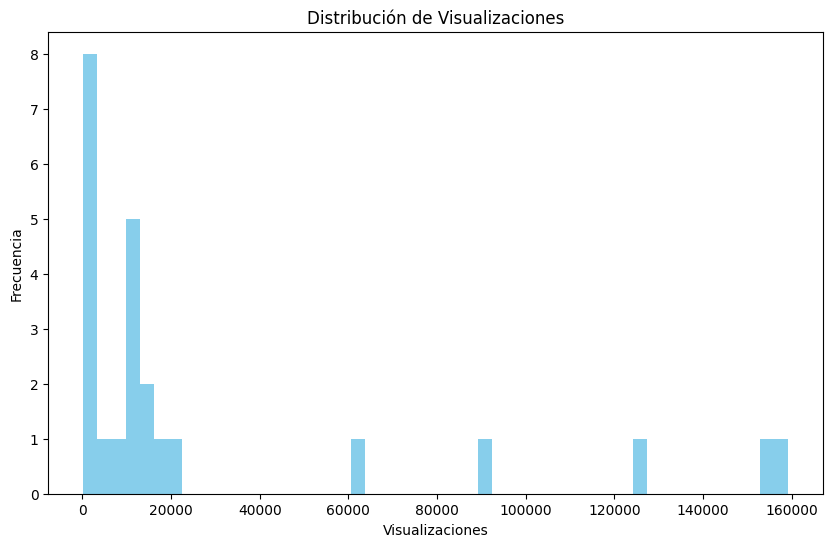

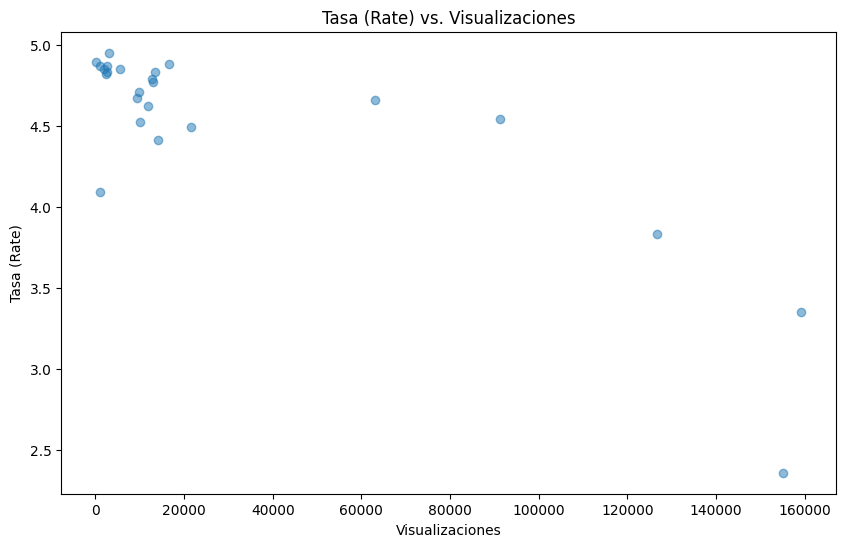

In [18]:
import matplotlib.pyplot as plt

# Gráfico 1: Distribución de las visualizaciones
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['views'], bins=50, color='skyblue')
plt.title('Distribución de Visualizaciones')
plt.xlabel('Visualizaciones')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico 2: Tasa (Rate) vs. Visualizaciones
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['views'], df_filtered['rate'], alpha=0.5)
plt.title('Tasa (Rate) vs. Visualizaciones')
plt.xlabel('Visualizaciones')
plt.ylabel('Tasa (Rate)')
plt.show()


In [19]:
# Exportar a CSV
df_filtered.to_csv('filtered_data.csv', index=False)
print("¡Archivo CSV creado!")


¡Archivo CSV creado!
